Question 1

In [2]:
import pandas as pd

data = pd.read_excel('WestRoxbury.xlsx')


   TOTAL VALUE    TAX  LOT SQFT   YR BUILT  GROSS AREA   LIVING AREA  FLOORS   \
0         344.2  4330       9965      1880         2436         1352      2.0   
1         412.6  5190       6590      1945         3108         1976      2.0   
2         330.1  4152       7500      1890         2294         1371      2.0   
3         498.6  6272      13773      1957         5032         2608      1.0   
4         331.5  4170       5000      1910         2370         1438      2.0   

   ROOMS  BEDROOMS   FULL BATH  HALF BATH  KITCHEN  FIREPLACE REMODEL  
0      6          3          1          1        1          0    None  
1     10          4          2          1        1          0  Recent  
2      8          4          1          1        1          0    None  
3      9          5          1          1        1          1    None  
4      7          3          2          0        1          0    None  


Question 2

In [3]:
data.columns.tolist()

['TOTAL VALUE ',
 'TAX',
 'LOT SQFT ',
 'YR BUILT',
 'GROSS AREA ',
 'LIVING AREA',
 'FLOORS ',
 'ROOMS',
 'BEDROOMS ',
 'FULL BATH',
 'HALF BATH',
 'KITCHEN',
 'FIREPLACE',
 'REMODEL']

Question 3

In [5]:
data.dtypes

TOTAL VALUE     float64
TAX               int64
LOT SQFT          int64
YR BUILT          int64
GROSS AREA        int64
LIVING AREA       int64
FLOORS          float64
ROOMS             int64
BEDROOMS          int64
FULL BATH         int64
HALF BATH         int64
KITCHEN           int64
FIREPLACE         int64
REMODEL          object
dtype: object

Question 4

In [6]:
dimensions = data.shape

# Display the dimensions
print("Number of rows:", dimensions[0])
print("Number of columns:", dimensions[1])

Number of rows: 5802
Number of columns: 14


Question 5

In [10]:
first_column = data.iloc[:, 0]  
column_mean = first_column.mean()
column_median = first_column.median()

# Display the mean and median of the first column
print("Mean of TOTAL VALUE column:", column_mean)
print("Median of TOTAL VALUE column:", column_median)

Mean of TOTAL VALUE column: 392.9841462908525
Median of TOTAL VALUE column: 376.1


Question 6

In [21]:
# Sample 75% of the data for preprocessing
sam_df = data.sample(frac=0.75, random_state=42)  

# Display the dimensions of the sampled DataFrame
sam_df

,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
5070,306.3,3853,5300,1954,2578,1227,1.0,6,3,1,1,1,1,None
1103,305.2,3839,4160,1950,2912,1120,1.0,6,3,1,0,1,1,None
812,239.2,3009,5086,1920,1910,1070,1.5,6,2,1,0,1,0,None
1632,396.5,4987,7480,1950,3080,1816,2.0,7,3,1,1,1,0,None
1128,322.5,4057,4000,1935,3061,1566,2.0,7,3,1,0,1,1,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,313.7,3946,4288,1965,2368,1368,2.0,9,4,1,1,1,1,None
1547,550.5,6925,5400,1991,5032,2924,2.0,7,3,1,1,1,1,None
2012,459.9,5785,5750,1951,3109,1869,2.0,7,3,1,1,1,1,Recent
588,270.3,3400,3166,1960,2647,1128,1.0,6,3,1,0,1,1,None


Question 7

Number of missing values in the TOTAL VALUE: 19


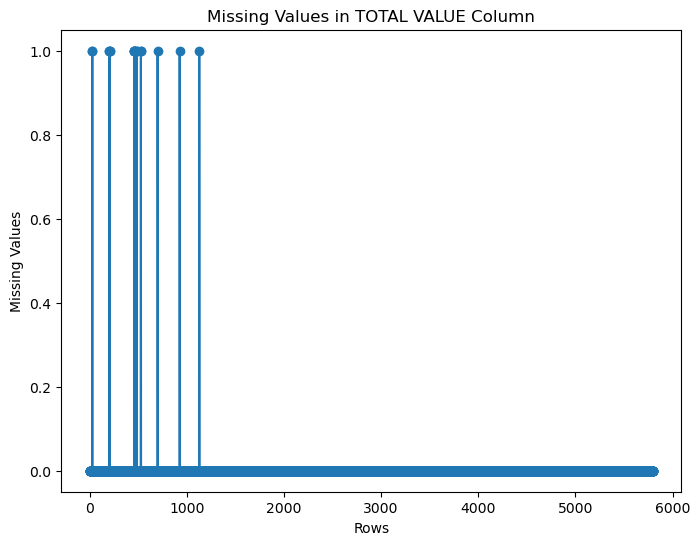

Number of missing values in TOTAL VALUE column after imputation: 0


In [15]:
import matplotlib.pyplot as plt

# Check for missing values in the TOTAL VALUE column
first_column_missing = data.iloc[:, 0].isnull().sum()

print("Number of missing values in the TOTAL VALUE:", first_column_missing)

# Plot missing values in the first column
plt.figure(figsize=(8, 6))
plt.title('Missing Values in TOTAL VALUE Column')
plt.xlabel('Rows')
plt.ylabel('Missing Values')

plt.plot(data.iloc[:, 0].isnull().astype(int), marker='o')
plt.show()

# Imputation to treat missing values in the first column (for example, using mean imputation)
first_column_mean = data.iloc[:, 0].mean()
data.iloc[:, 0].fillna(first_column_mean, inplace=True)

# Check if missing values are filled after imputation
print("Number of missing values in TOTAL VALUE column after imputation:", data.iloc[:, 0].isnull().sum())


Question 8

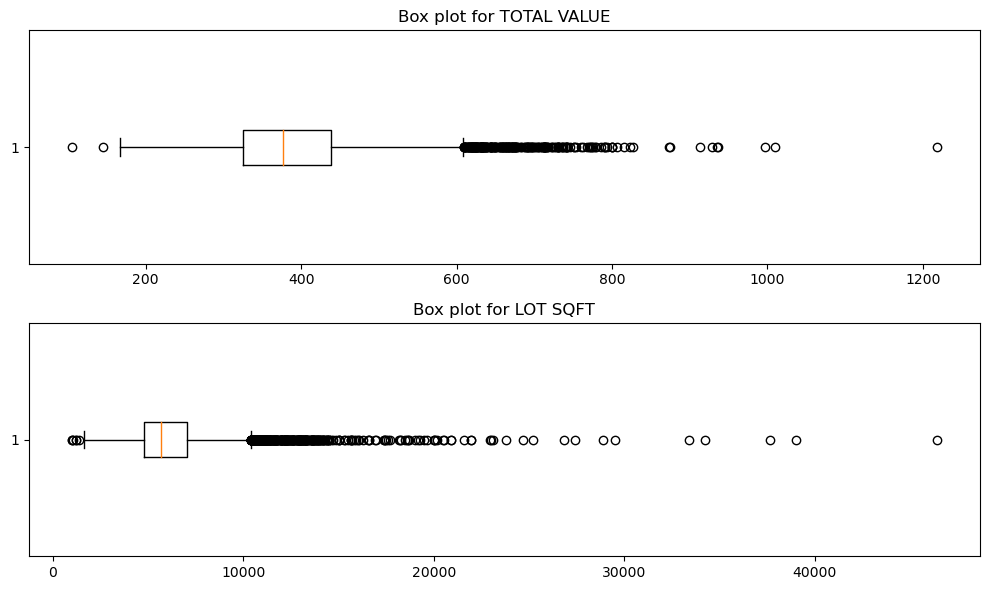

Outliers in Column 1:
1157    716.4
1206    726.1
1377    730.3
1467    773.5
2116    709.2
        ...  
4657    791.6
4762    735.4
4960    710.2
5034    736.7
5159    700.7
Name: TOTAL VALUE , Length: 85, dtype: float64

Outliers in Column 3:
72      20000
233     24677
327     14707
439     19466
480     19264
        ...  
4567    20181
4571    46411
4762    20467
5539    16533
5621    20927
Name: LOT SQFT , Length: 74, dtype: int64


In [17]:
# Columns of interest (1st and 3rd columns)
column_1 = data.iloc[:, 0]
column_3 = data.iloc[:, 2]

# Create Box plots for columns 1 and 3
plt.figure(figsize=(10, 6))

# Box plot for column 1
plt.subplot(2, 1, 1)
plt.boxplot(column_1, vert=False)
plt.title('Box plot for TOTAL VALUE')

# Box plot for column 3
plt.subplot(2, 1, 2)
plt.boxplot(column_3, vert=False)
plt.title('Box plot for LOT SQFT')

plt.tight_layout()
plt.show()

# Function to calculate Z-scores
def z_score(data):
    mean = data.mean()
    std_dev = data.std()
    z_scores = (data - mean) / std_dev
    return z_scores

# Calculate Z-scores for columns 1 and 3
column_1_z_scores = z_score(column_1)
column_3_z_scores = z_score(column_3)

# Define a threshold for outlier detection (e.g., Z-score > 3 or < -3)
outlier_threshold = 3

# Identify outliers using Z-score method for columns 1 and 3
outliers_column_1 = column_1[(column_1_z_scores > outlier_threshold) | (column_1_z_scores < -outlier_threshold)]
outliers_column_3 = column_3[(column_3_z_scores > outlier_threshold) | (column_3_z_scores < -outlier_threshold)]

print("Outliers in Column 1:")
print(outliers_column_1)

print("\nOutliers in Column 3:")
print(outliers_column_3)


Question 9

In [18]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Find columns with high correlation (threshold > 0.7 or <-0.7 usually indicates strong correlation)
highly_correlated = correlation_matrix[(correlation_matrix > 0.7) & (correlation_matrix < 1.0)]
print("\nColumns with high correlation:")
print(highly_correlated)

Correlation Matrix:
              TOTAL VALUE        TAX  LOT SQFT   YR BUILT  GROSS AREA   \
TOTAL VALUE       1.000000  0.998418   0.546360 -0.100934     0.799577   
TAX               0.998418  1.000000   0.546120 -0.100918     0.800518   
LOT SQFT          0.546360  0.546120   1.000000 -0.068908     0.448880   
YR BUILT         -0.100934 -0.100918  -0.068908  1.000000    -0.167928   
GROSS AREA        0.799577  0.800518   0.448880 -0.167928     1.000000   
LIVING AREA       0.836500  0.837122   0.426045 -0.131274     0.899775   
FLOORS            0.479619  0.481524   0.073662 -0.190453     0.300666   
ROOMS             0.637858  0.638542   0.308395 -0.144686     0.651501   
BEDROOMS          0.562195  0.561872   0.254106 -0.130411     0.571791   
FULL BATH         0.433893  0.432806   0.201317  0.073706     0.419734   
HALF BATH         0.346917  0.348165   0.134996  0.060685     0.226683   
KITCHEN           0.018962  0.018261   0.044525  0.052091     0.030501   
FIREPLACE         

C:\Users\arreb\AppData\Local\Temp\ipykernel_25692\2355477533.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


Question 10

In [19]:
# Check data types of columns
print("Data Types of Columns:")
print(data.dtypes)

# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Perform one-hot encoding for categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_columns)

# Display the transformed dataset after one-hot encoding
print("Transformed Dataset after One-Hot Encoding:")
print(data_encoded.head())


Data Types of Columns:
TOTAL VALUE     float64
TAX               int64
LOT SQFT          int64
YR BUILT          int64
GROSS AREA        int64
LIVING AREA       int64
FLOORS          float64
ROOMS             int64
BEDROOMS          int64
FULL BATH         int64
HALF BATH         int64
KITCHEN           int64
FIREPLACE         int64
REMODEL          object
dtype: object
Transformed Dataset after One-Hot Encoding:
   TOTAL VALUE    TAX  LOT SQFT   YR BUILT  GROSS AREA   LIVING AREA  FLOORS   \
0         344.2  4330       9965      1880         2436         1352      2.0   
1         412.6  5190       6590      1945         3108         1976      2.0   
2         330.1  4152       7500      1890         2294         1371      2.0   
3         498.6  6272      13773      1957         5032         2608      1.0   
4         331.5  4170       5000      1910         2370         1438      2.0   

   ROOMS  BEDROOMS   FULL BATH  HALF BATH  KITCHEN  FIREPLACE  REMODEL_None  \
0      6         

Question 11

In [24]:
from sklearn.preprocessing import StandardScaler

# Identify non-numeric columns
non_numeric_cols = sam_df.select_dtypes(exclude=['number']).columns.tolist()

# Drop non-numeric columns or handle them accordingly (convert to numeric, impute missing values, etc.)
sam_df_numeric = sam_df.drop(columns=non_numeric_cols)

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the numeric data from samp_df_numeric
norm_data = scaler.fit_transform(sam_df_numeric)

# Create a new DataFrame 'norm_df' from the standardized data
norm_df = pd.DataFrame(norm_data, columns=sam_df_numeric.columns)

# Display the first few rows of the normalized DataFrame
print("Normalized DataFrame (norm_df):")
print(norm_df.head())

Normalized DataFrame (norm_df):
   TOTAL VALUE        TAX  LOT SQFT   YR BUILT  GROSS AREA   LIVING AREA  \
0     -0.877065 -0.871499  -0.373017  0.442315    -0.389564    -0.791242   
1     -0.888136 -0.882678  -0.803460  0.339640    -0.017783    -0.986374   
2     -1.552407 -1.545457  -0.453820 -0.430425    -1.133124    -1.077558   
3      0.030773  0.034033   0.450110  0.339640     0.169220     0.282898   
4     -0.714016 -0.708599  -0.863873 -0.045392     0.148071    -0.173019   

    FLOORS      ROOMS  BEDROOMS   FULL BATH  HALF BATH   KITCHEN  FIREPLACE  
0 -1.533592 -0.694067  -0.274010  -0.567311   0.711241 -0.125044   0.459658  
1 -1.533592 -0.694067  -0.274010  -0.567311  -1.161306 -0.125044   0.459658  
2 -0.414887 -0.694067  -1.446567  -0.567311  -1.161306 -0.125044  -1.304392  
3  0.703818  0.003688  -0.274010  -0.567311   0.711241 -0.125044  -1.304392  
4  0.703818  0.003688  -0.274010  -0.567311  -1.161306 -0.125044   0.459658  


Question 12

In [25]:
from sklearn.model_selection import train_test_split

# Get all column names except the target column
all_columns_except_target = [col for col in norm_df.columns if col != 'ROOMS']

# Select all columns except the target as features (X)
X = norm_df[all_columns_except_target]
y = norm_df['ROOMS']  # Target variable

# Split the data into training and testing sets (80% train, 20% test in this example)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting training and testing sets
print("Shapes of Training and Testing Data:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Shapes of Training and Testing Data:
X_train shape: (3481, 12)
X_test shape: (871, 12)
y_train shape: (3481,)
y_test shape: (871,)


Question 13

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Initialize the linear regression model
linear_reg = LinearRegression()

# Fit the model on the training data
linear_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = linear_reg.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print("Evaluation Metrics:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


Evaluation Metrics:
Mean Squared Error (MSE): 0.35542566701311246
R-squared (R2) Score: 0.6506126045883769
